In [1]:
!pip install mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 8.5 MB/s eta 0:00:00


In [2]:
import cv2
import mediapipe as mp
from google.colab import files

In [15]:
# Upload an image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

Saving pose 1.jpg to pose 1.jpg


In [16]:
# Initialize Mediapipe pose and drawing utilities
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

In [17]:
# Read the uploaded image
image = cv2.imread(image_path)

In [18]:
# Convert the image to RGB
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [19]:
# Initialize the pose estimator
with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5) as pose:
    # Process the image
    results = pose.process(rgb_image)
    # Draw pose landmarks on the image
    if results.pose_landmarks:
        annotated_image = image.copy()
        mp_drawing.draw_landmarks(
            annotated_image,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2),
            mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
        )
         # Save and display the image
        output_path = "annotated_image.jpg"
        cv2.imwrite(output_path, annotated_image)
        print(f"Pose estimation completed. Saved annotated image as {output_path}.")
    else:
        print("No pose detected in the image.")

Pose estimation completed. Saved annotated image as annotated_image.jpg.


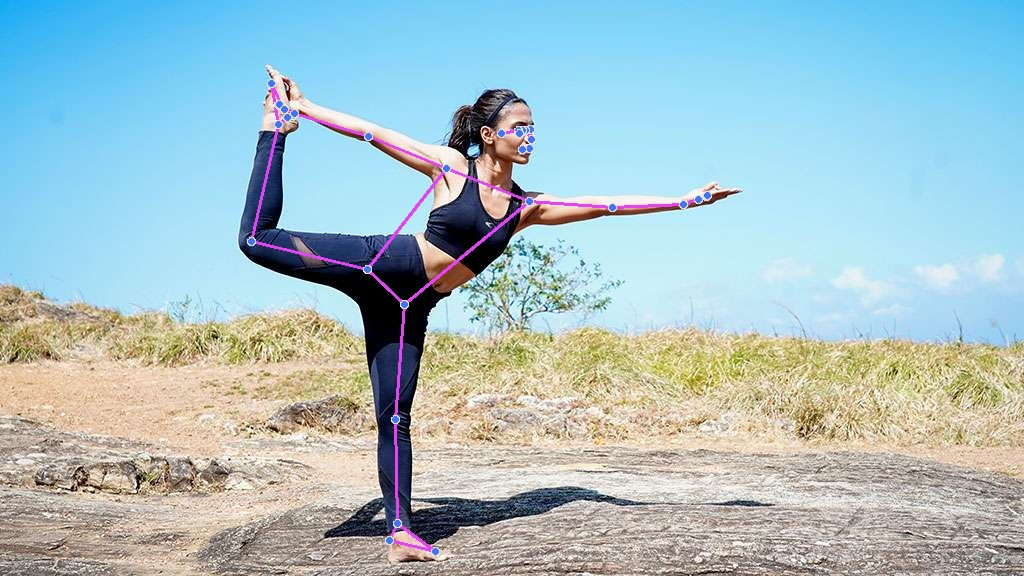

In [20]:

# Display the annotated image
from IPython.display import Image, display
display(Image(output_path))